## Trips by weather


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
file_path = "C:/Users/Adrian/Documents/Studium/Projekte/DSML Bikesharing/PredictiveStruggle_BikeSharing"
#read weatherdata
chicago_data = pd.read_csv(file_path+"/chicago_2016.csv", sep=",", parse_dates = ["start_time","end_time"])

In [52]:
weather = pd.read_csv(file_path+"/weather_hourly_chicago.csv",parse_dates = ["date_time"])

In [4]:
#add weather feature to trips
weather.head(3)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.7,-1.7,0.0
1,2015-01-02 02:00:00,-2.2,-2.2,0.0
2,2015-01-02 03:00:00,-2.8,-2.8,0.0


In [56]:
#add day feature
#only keep 2016 data
weather = weather[weather["date_time"].apply(lambda x:x.year == 2016)]
weather = weather.dropna()
weather.sort_values(by="date_time")
#resample data to daily
weather_daily = weather.resample("D",on="date_time").agg({"max_temp":"max","min_temp":"min","precip":"sum"})
weather_daily.tail(3)

,max_temp,min_temp,precip
date_time,,,
2016-12-29,4.4,-1.1,1.0
2016-12-30,0.6,-4.4,1.0
2016-12-31,4.4,-1.1,0.0


In [58]:
#add day features
chicago_data["day"] = chicago_data["start_time"].apply(lambda x:x.dayofyear)
weather_daily["day"] = weather_daily.index.to_series().apply(lambda x:x.dayofyear)

In [60]:
weather_daily.head(3)

,max_temp,min_temp,precip,day
date_time,,,,
2016-01-01,-1.7,-7.2,2.0,1
2016-01-02,0.0,-6.7,0.0,2
2016-01-03,-1.1,-5.0,2.0,3


In [61]:
chicago_weather = chicago_data.merge(weather_daily,left_on="day",right_on="day",how="left")
chicago_weather.head(3)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,day,max_temp,min_temp,precip
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber,91,18.9,12.8,8.0
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber,91,18.9,12.8,8.0
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber,91,18.9,12.8,8.0


In [62]:
#get number of rides per temperature
chicago_by_max_temp = chicago_weather["start_station_id"].groupby(pd.cut(chicago_weather["max_temp"], np.arange(-15, 36, 1))).count()
chicago_by_max_temp.iloc[:5]

max_temp
(-15, -14]       0
(-14, -13]    1233
(-13, -12]       0
(-12, -11]    2119
(-11, -10]    1709
Name: start_station_id, dtype: int64

<BarContainer object of 50 artists>

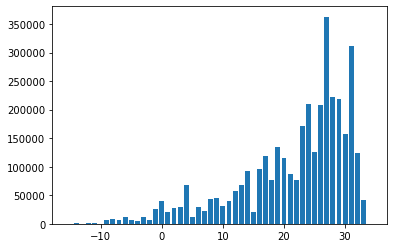

In [63]:
plt.bar(np.arange(-15,35,1),chicago_by_max_temp)
#relative?

In [73]:
chicago_by_precip = chicago_weather["start_station_id"].groupby(pd.cut(chicago_weather["precip"], np.arange(0, 21, 0.5))).count()
chicago_by_precip.tail(3)

precip
(19.0, 19.5]      0
(19.5, 20.0]    687
(20.0, 20.5]      0
Name: start_station_id, dtype: int64

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5]


<BarContainer object of 41 artists>

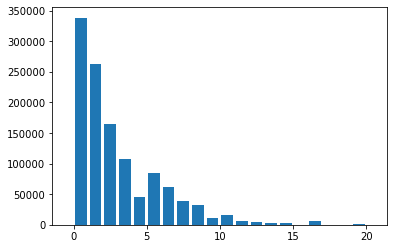

In [78]:
plt.bar(np.arange(0,20.4,0.5),chicago_by_precip)